In [6]:
from __future__ import annotations

from dataclasses import dataclass
from fractions import Fraction
from functools import total_ordering

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from matplotlib import collections as mc
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sortedcontainers import SortedList

from utillities.test_utilities import run_tests_params


In [7]:
@dataclass(order=True, frozen=True, slots=True)
class Point:
    x: float = 0.0
    y: float = 0.0

    def __add__(self, other: Point):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other: Point):
        return Point(self.x - other.x, self.y - other.y)

    def __truediv__(self, other: int):
        if isinstance(other, int):
            return Point(self.x / other, self.y / other)
        return NotImplemented

    def __floordiv__(self, other: int):
        if isinstance(other, int):
              return Point(self.x // other, self.y // other)
        return NotImplemented

    def __iter__(self) -> int | StopIteration:
        yield self.x
        yield self.y


In [8]:
@dataclass(order=True, frozen=True, slots=True)
class Segment:
    p1: Point
    p2: Point
    
    def intersects_with(self, o: Segment) -> Point | None:
        ((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)) = self, o
        
        t = (x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)
        t /= (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

        u = (x1 - x3) * (y1 - y2) - (y1 - y3) * (x1 - x2)
        u /= (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

        if 0 <= t <= 1 and 0 <= u <= 1:
            return Point(x1 + t * (x2 - x1), y1 + t * (y2 - y1)) 
        return None
    
    def __iter__(self) -> Point | StopIteration:
        yield self.p1
        yield self.p2

In [9]:
def plot_two_linesegements(s1: Segment, s2: Segment, show=True, txt=True):
    ((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)) = s1, s2
    plt.plot([x1, x2, x3, x4], [y1, y2, y3, y4], 'o')
    plt.plot([x1, x2], [y1, y2], 'k-')
    plt.plot([x3, x4], [y3, y4], 'k-')

    intercept = s1.intersects_with(s2)
    if intercept:
        xi, yi = intercept
        plt.plot([xi], [yi], 'ro')
        if txt:
            plt.text(xi, yi - 0.1, f'  <--intercept={xi:.2f}, {yi:.2f}')

    if show:
        plt.show()

def plot_line_segments(S):
    for i in range(len(S)):
        e1 = S[i]
        for j in range(i + 1, len(S)):
            e2 = S[j]
            plot_two_linesegements(e1, e2, False, False)
    plt.show()


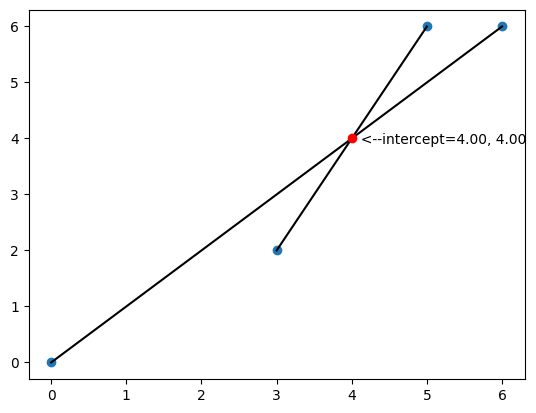

In [10]:
s1 = Segment(Point(3, 2), Point(5, 6))
s2 = Segment(Point(0, 0), Point(6, 6))
plot_two_linesegements(s1, s2)


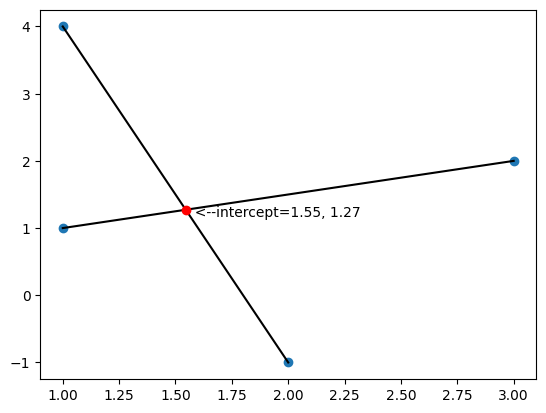

In [11]:
s1 = Segment(Point(1, 1), Point(3, 2))
s2 = Segment(Point(1, 4), Point(2, -1))
plot_two_linesegements(s1, s2)


assert s1.intersects_with(s2) == Point(17/11, 14/11)

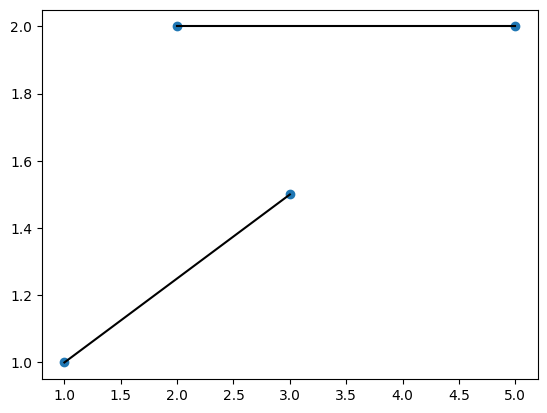

In [12]:
s2 = Segment(Point(1, 1), Point(3, 1.5))
s1 = Segment(Point(2, 2), Point(5, 2))
plot_two_linesegements(s1, s2)


assert s1.intersects_with(s2) is None

In [13]:
def find_intersections(S: list[Segment]) -> list[Point]:
    intersection_points = []
    for i in range(len(S)):
        e1 = S[i]
        for j in range(i + 1, len(S)):
            e2 = S[j]
            intersect = e1.intersects_with(e2)
            if intersect is not None:
                intersection_points.append(intersect)
    return intersection_points


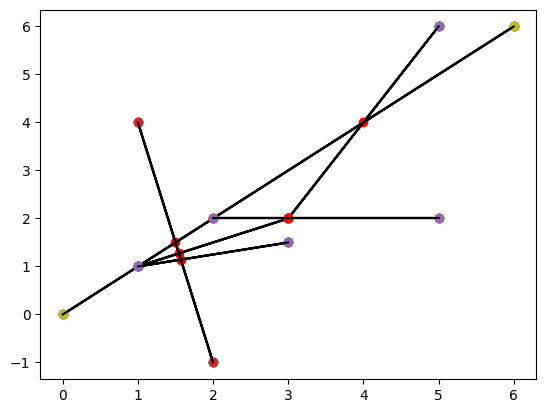

[Point(x=1.0, y=1.0),
 Point(x=1.0, y=1.0),
 Point(x=1.0, y=1.0),
 Point(x=1.5, y=1.5),
 Point(x=1.5454545454545454, y=1.2727272727272727),
 Point(x=1.5714285714285714, y=1.1428571428571432),
 Point(x=2.0, y=2.0),
 Point(x=3.0, y=2.0),
 Point(x=3.0, y=2.0),
 Point(x=3.0, y=2.0),
 Point(x=4.0, y=4.0)]

In [14]:
S = [
    Segment(Point(3, 2), Point(5, 6)),
    Segment(Point(0, 0), Point(6, 6)),
    Segment(Point(1, 1), Point(3, 2)),
    Segment(Point(1, 4), Point(2, -1)),
    Segment(Point(1, 1), Point(3, 1.5)),
    Segment(Point(2, 2), Point(5, 2)),

]

plot_line_segments(S)
sorted(find_intersections(S))

In [15]:
@dataclass(order=True, frozen=True, slots=True)
class Event:
    ...